<a href="https://colab.research.google.com/github/rdesarz/multi_object_tracking/blob/develop/yolov3_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object detection based on Yolo V3
This notebook is largerly inspired by the following tutorials: https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/. The main goal is to try to use Yolo v3 model to detect and classify object in a scene. 

## Environment setup
If you intend to use this notebook in Google Colab, use the following command to create a new folder to download the data and the required libraries:



In [0]:
from google.colab import drive
import os

# Uncomment to mount your google drive in Google Colab
#drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Object detection')


## Dataset and model download
The following section load the weight of a pre-trained yolo v3 model and save it as a Keras model. You can skip this section if you already have the model.

In [34]:
# Before importing yolo3 please make sure that you have imported downloaded the model
import yolo3

# Uncomment if you need to download the weights of yolov3 model
#!wget  https://pjreddie.com/media/files/yolov3.weights
# define the model
model = yolo3.make_yolov3_model()
# load the model weights
weight_reader = yolo3.WeightReader('yolov3.weights')
# set the model weights into the model
weight_reader.load_weights(model)
# save the model to file
model.save('yolov3.h5')

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

## Load model and try a prediction

zebra 94.91059184074402
zebra 99.86329674720764
zebra 96.87087535858154


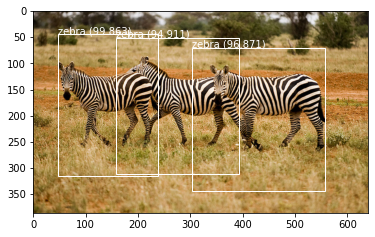

In [37]:
# define the expected input shape for the model
input_w, input_h = 416, 416
# define our new photo
photo_filename = 'zebra.jpg'
# load and prepare image
image, image_w, image_h = yolo3.load_image_pixels(photo_filename, (input_w, input_h))
# make prediction
yhat = model.predict(image)
# define the anchors
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
# define the probability threshold for detected objects
class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
    # decode the output of the network
    boxes += yolo3.decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
# correct the sizes of the bounding boxes for the shape of the image
yolo3.correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)
# suppress non-maximal boxes
yolo3.do_nms(boxes, 0.5)
# define the labels
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
	"boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
	"bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
	"backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
	"sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
	"tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
	"apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
	"chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
	"remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
	"book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
# get the details of the detected objects
v_boxes, v_labels, v_scores = yolo3.get_boxes(boxes, labels, class_threshold)
# summarize what we found
for i in range(len(v_boxes)):
    print(v_labels[i], v_scores[i])
# draw what we found
yolo3.draw_boxes(photo_filename, v_boxes, v_labels, v_scores)